In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
df = pd.read_csv('world_happiness_report.csv')

In [3]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
from sklearn.model_selection import train_test_split
predictors = ['Healthy life expectancy', 'GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption']
x = np.log(df[predictors]+1).copy()
y = np.log(df['Score']).copy()


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

In [8]:
y_predict = model.predict(x_test)
y_predict_plot = pd.DataFrame(y_predict)[0].values

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
prediction_train = model.predict(x_train)
print("R Square score train :", r2_score(y_train, prediction_train))
print("Mean Square Error :", mean_squared_error(y_train, prediction_train))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_train, prediction_train)))

R Square score train : 0.7762175605683898
Mean Square Error : 0.010316910729224093
Root Mean Square Error:  0.10157219466578485


In [10]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_predict))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_predict))

Coefficients: [0.39004178 0.21558143 0.46036487 0.3835795  0.10527955 0.11786998]
Intercept: 0.8111171770006714
Mean squared error (MSE): 0.01
Coefficient of determination (R^2): 0.67


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


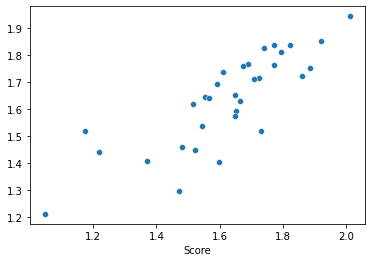

In [12]:
sns.scatterplot(y_test, y_predict)


Summmary : Regression linear model has a good prediction due to its high R square score train (0,77) and low value of Mean square eror (0,01) and Low Root mean square eror (0,101). So the model itself show relevant connection between predictor and target (Score). in other way predictors aspect such as Healthy life expectancy, GDP per capita, Social support, Freedom to make life choices, Generosity, Perceptions of corruption could affect happiness level of a person(Score) 